# Exploratory Data Analysis

Question: What are the characteristics that have the most impact on the car price?

### Descriptive Statistics

In [4]:
import pandas as pd
import numpy as np

In [32]:
df=pd.read_csv('clean_df.csv')
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,price-binned,diesel,gas,std,turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,64.1,...,111.0,5000.0,21,27,13495.0,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,64.1,...,111.0,5000.0,21,27,16500.0,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,65.5,...,154.0,5000.0,19,26,16500.0,Low,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,66.2,...,102.0,5500.0,24,30,13950.0,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,66.4,...,115.0,5500.0,18,22,17450.0,Low,0,1,1,0


In [33]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,diesel,gas,std,turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,65.889055,53.766667,2555.666667,126.875622,3.330692,3.256874,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
drive_wheels_count=df['drive-wheels'].value_counts().to_frame()
drive_wheels_count.rename(columns={'drive-wheels':'value_count'},inplace=True)
drive_wheels_count.index.name='drive-wheels'
drive_wheels_count

,value_count
drive-wheels,
fwd,118
rwd,75
4wd,8


## Correlation

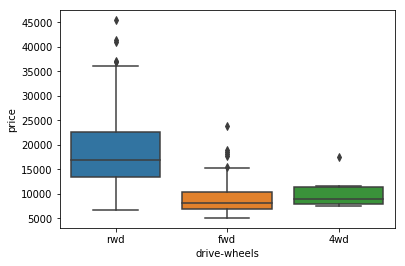

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.boxplot(x='drive-wheels',y='price',data=df)

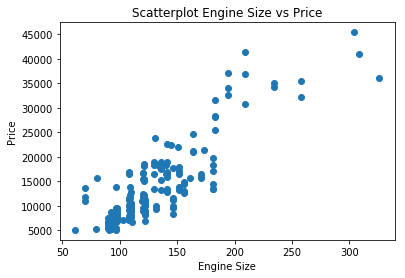

In [42]:
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Scatterplot Engine Size vs Price')
plt.scatter(df['engine-size'],df['price'])

Theres a positive linear relationship between these two variables.

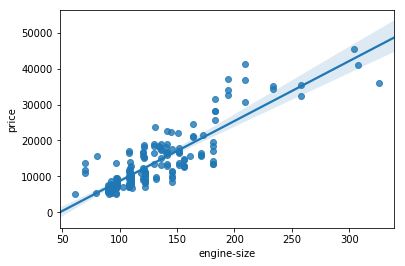

In [51]:
sns.regplot(x='engine-size',y='price',data=df)

If we want to check only the correlation between these two variables we use the .corr() for pearson correlative method:

In [52]:
df[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


Where we can see that engine-size have a correlation of 0.87, which is pretty high.

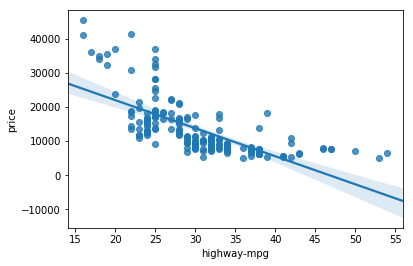

In [53]:
sns.regplot(x='highway-mpg',y='price',data=df)

Here we have a negative/inverse relationship between two variables, so Highway mpg could be a predictor of price. We can see this when we check the correlation.

In [54]:
df[['highway-mpg','price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


As far the correlation is far away from 1.0 less correlation it's in between these variables. And if the correlation is close to 0 there's no correlation at all

### GroupBy

In [48]:
#as_index remove the index that are automatically set in groupby
df_test=df[['drive-wheels','body-style','price']].copy()
df_grp=df_test.groupby(['drive-wheels','body-style'],as_index=False).mean()
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


These data seems hard to understand what it's going on, to make it easier let's pivot that table.

In [50]:
df_pivot=df_grp.pivot(index='drive-wheels',columns='body-style')
df_pivot.fillna(0,inplace=True)
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

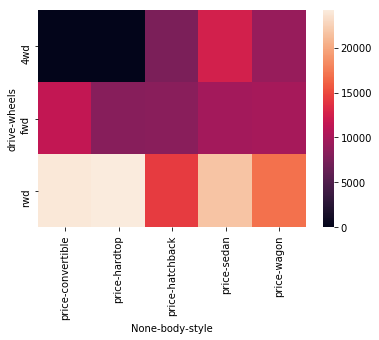

In [56]:
sns.heatmap(df_pivot)

### P-Value

<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

<h3>Wheel-base vs Price</h3>

In [61]:
from scipy import stats

In [117]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5846418222655081  with a P-value of P = 8.076488270732955e-20


In [118]:
1-p_value

1.0

Since the p-value is  <  0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)

<h3> Horsepower vs Price</h3>

In [119]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8095745670036559  with a P-value of P = 6.36905742825998e-48


In [120]:
1-p_value

1.0

Since the p-value is  <  0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship is quite strong (~0.809)

<h3> Length vs Price</h3>

In [121]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.690628380448364  with a P-value of P =  8.016477466159053e-30


In [122]:
1-p_value

1.0

Since the p-value is  <  0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship is moderately strong (~0.690)

<h3>Width vs Price</h3>

In [123]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522673  with a P-value of P = 9.20033551048166e-38


In [124]:
1-p_value

1.0

Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

### Curb-weight vs Price

In [125]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702846  with a P-value of P =  2.1895772388936997e-53


In [126]:
1-p_value

1.0

Since the p-value is  <  0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).

<h3>Engine-size vs Price</h3>

In [127]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622197996e-64


In [128]:
1-p_value

1.0

Since the p-value is  <  0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship is very strong (~0.872)

<h3>Bore vs Price</h3>

In [129]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =   8.049189483935364e-17


In [130]:
1-p_value

0.9999999999999999

Since the p-value is $<$ 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521)

<h3>City-mpg vs Price</h3>

In [131]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is -0.6865710067844677  with a P-value of P =  2.3211320655676368e-29


In [132]:
1-p_value

1.0

Since the p-value is $<$ 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of (~-0.687) shows that the relationship is negative and moderately strong

<h3>Highway-mpg vs Price</h3>

In [133]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is -0.7046922650589529  with a P-value of P =  1.7495471144476807e-31


In [134]:
1-p_value

1.0

Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of (~-0.705) shows that the relationship is negative and moderately strong

## ANOVA (Analysis of Variance)

<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant is our calculated score value.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.</p>

In [142]:
df_gptest = df[['drive-wheels','body-style','price']]

In [143]:
df_grp2=df_gptest[['drive-wheels','price']].groupby(['drive-wheels'])
df_grp2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [146]:
df_grp2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [148]:
# ANOVA
f_val, p_val = stats.f_oneway(df_grp2.get_group('fwd')['price'], df_grp2.get_group('rwd')['price'], df_grp2.get_group('4wd')['price'])
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


In [149]:
1-p_val

1.0

This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated?

#### fwd and rwd

In [151]:
f_val, p_val = stats.f_oneway(df_grp2.get_group('fwd')['price'], df_grp2.get_group('rwd')['price'])  
print( "ANOVA results: F=", f_val, ", P =", 1-p_val )

ANOVA results: F= 130.5533160959111 , P = 1.0


#### 4wd and rwd

In [152]:
f_val, p_val = stats.f_oneway(df_grp2.get_group('4wd')['price'], df_grp2.get_group('rwd')['price'])  
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


<h4>4wd and fwd</h4>

In [153]:
f_val, p_val = stats.f_oneway(df_grp2.get_group('4wd')['price'], df_grp2.get_group('fwd')['price'])  
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


Now we have how looks like our data and some insights about our data.